# 7. Sharpe ratio and other portfolio statistics

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

## Daily portfolio value

Shift focus from indivual stocks to portfolios. Portfolio: allocation of funds to a set of stocks.

In [3]:
def load_stock(symbol):
    df = pd.read_csv(f'data/{symbol}.csv', index_col='Date',
                       parse_dates=True, usecols=['Date', 'Adj Close'],
                       na_values=['nan'])
    df = df.rename(columns={'Adj Close': symbol})
    return df

In [4]:
# Specify a portfolio
symbols = ['GLD', 'AAPL', 'SPY']
alloc   = [ 0.2,    0.6,    0.2]
dates = pd.date_range('2019-01-01', '2020-01-01')

# Build a df
df = pd.DataFrame(index=dates)
for symbol in symbols:
    symbol_df = load_stock(symbol)
    df = df.join(symbol_df, how='inner')
df.head()

,GLD,AAPL,SPY
2019-03-01,121.879997,172.709381,275.208740
2019-03-04,121.559998,173.578033,274.207642
2019-03-05,121.720001,173.262161,273.834717
2019-03-06,121.610001,172.265228,272.176117
2019-03-07,121.510002,170.271317,269.899231


In [5]:
normed = (df / df.iloc[0])
alloced = normed * alloc
pos_vals = alloced * df.iloc[0]

In [6]:
port_val = pos_vals.sum(axis=1)
port_val.head()

2019-03-01    183.043376
2019-03-04    183.300348
2019-03-05    183.068240
2019-03-06    182.116360
2019-03-07    180.444637
dtype: float64

Text(0.5, 1.0, 'portfolio value over time')

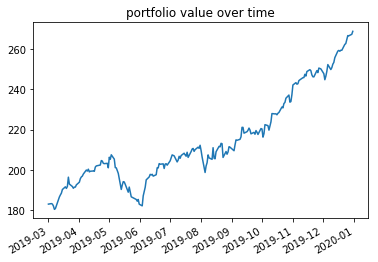

In [7]:
port_val.plot()
title('portfolio value over time')

## Portfolio statistics

In [8]:
daily_rets = port_val.shift(-1) / port_val - 1
daily_rets.head()

2019-03-01    0.001404
2019-03-04   -0.001266
2019-03-05   -0.005200
2019-03-06   -0.009179
2019-03-07    0.002222
dtype: float64

In [17]:
port_val.pct_change(1).head()

2019-03-01         NaN
2019-03-04    0.001404
2019-03-05   -0.001266
2019-03-06   -0.005200
2019-03-07   -0.009179
dtype: float64

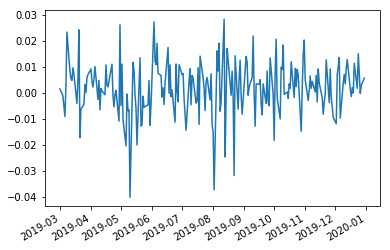

In [9]:
daily_rets.plot()

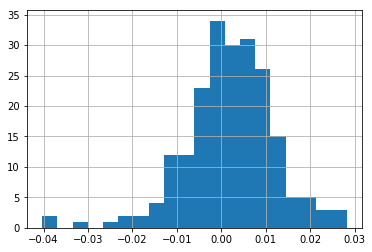

In [10]:
daily_rets.hist(bins=20)

### Cumulative daily returns

In [11]:
cum_daily_rets = port_val[-1] / port_val[0] - 1
cum_daily_rets

0.4680936774243061

### Average daily returns

In [12]:
avg_daily_rets = daily_rets.mean(); avg_daily_rets

0.0018736703963118811

### Standard deviation of daily returns

In [13]:
std_daily_rets = daily_rets.std(); std_daily_rets

0.010236148478126548

### Sharpe ratio


#### Intuition
sharpe ratio: risk adjusted return.

all else being equal:
* low risk is better
* higher return is better

#### Formal definition
$R_p$: portfolio return, $R_f$: risk free return, $\sigma_p$: std of portfolio

$$S = \frac{\mathbb{E}(R_p - R_f)}{\text{std}[R_p - R_f]}$$

$\mathbb{E}(R_p - R_f)$ is an expectency, or a forward looking measure of what the sharpe ratio should be. To calculate this in reality, we need to look back at those values. The expected value of the difference is the mean over time.

$$S = \frac{\text{mean}[R_p - R_f]}{\text{std}[R_p - R_f]}$$

$R_f$ is tipically set to $0$, which gives:

$$S = \frac{\text{mean}[R_p - R_f]}{\text{std}[R_p]}$$

#### Varying SR

SR can vary widely depending on how frequently you sample (daily, monthly, annualy??). SR is an annual measure, so use adjustment factor $K$.

$$K = \sqrt{\text{# of samples per year}}$$

and

$$S_\text{annualized} = K * \text{SR}$$

daily: $K = \sqrt{255}$, weekly = $\sqrt{52}$, etc.

In [14]:
K = np.sqrt(255)
sharpe_ratio = K * (daily_rets.mean() - 0) / daily_rets.std()
sharpe_ratio

2.922985819637687

https://www.investopedia.com/ask/answers/010815/what-good-sharpe-ratio.asp

* A ratio under 1.0 is considered sub-optimal.
* Usually, any Sharpe ratio greater than 1.0 is considered acceptable to good by investors.
* A ratio higher than 2.0 is rated as very good.
* A ratio of 3.0 or higher is considered excellent.